In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

In [35]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data

contamination = 0.1  # percentage of outliers
n_train = 500  # number of training points
n_test = 500  # number of testing points
n_features = 25 # Number of features

X_train,X_test,y_train,y_test = generate_data(
    n_train=n_train, n_test=n_test,
    n_features= n_features, 
    contamination=contamination,random_state=1234)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [36]:
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from  tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
class Autoencoder_Large(Model):
    def __init__(self, no_of_variables):
        super(Autoencoder_Large, self).__init__()
        self.OUTPUT_SIZE = no_of_variables
        self.encoder = Sequential([
            Dense(64, activation='relu'),
            #Dense(64, activation='relu'),
            #Dense(64, activation='relu'),
            # Dropout(0.2),
            Dense(64, activation='relu'),
            # Dropout(0.3),
            Dense(32, activation='relu'),
            # Dropout(0.3),
            Dense(32, activation='relu'),
            # Dropout(0.4),
            Dense(16, activation='relu'),
            # Dropout(0.4),
            Dense(16, activation='relu'),
            # Dropout(0.4),
            Dense(8, activation='relu'),
            # Dropout(0.2),
            Dense(8, activation='relu'),
            Dense(4, activation='relu'),
            # Dense(2, activation='relu'),

            Dense(1, activation='sigmoid')
        ])
        self.decoder = Sequential([
            # Dense(1, activation='relu'),

            Dense(4, activation='relu'),
            Dense(8, activation='relu'),
            Dense(8, activation='relu'),
            # Dropout(0.2),
            Dense(16, activation='relu'),
            # Dropout(0.4),
            Dense(16, activation='relu'),
            # Dropout(0.4),
            Dense(32, activation='relu'),
            # Dropout(0.3),
            Dense(32, activation='relu'),
            # Dropout(0.3),
            Dense(64, activation='relu'),
            # Dropout(0.2),
            Dense(64, activation='relu'),
            # # Dropout(0.2),
            #Dense(64, activation='relu'), # removed for CPU
            # Dropout(0.2),
            #Dense(64, activation='relu'),
            # Dropout(0.2),
            Dense(32, activation='relu'),
            # Dropout(0.2),
            Dense(self.OUTPUT_SIZE, activation='linear')
        ])

    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [37]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
early_stopping = EarlyStopping(monitor='val_loss',
                                   patience = 10,
                                   mode = 'min',restore_best_weights=True)
    # Compiling
model = Autoencoder_Large(25)
optim = keras.optimizers.RMSprop()
model.compile(optimizer = optim,
                  loss = 'mae')

    # Training the model
history = model.fit(X_train,X_train,epochs = 500,batch_size = 128,validation_data = (X_test,X_test),callbacks = [early_stopping])

Epoch 1/500
4/4 [==============================] - 2s 78ms/step - loss: 2.8494 - val_loss: 2.8369
Epoch 2/500
4/4 [==============================] - 0s 11ms/step - loss: 2.8427 - val_loss: 2.8317
Epoch 3/500
4/4 [==============================] - 0s 12ms/step - loss: 2.8379 - val_loss: 2.8273
Epoch 4/500
4/4 [==============================] - 0s 11ms/step - loss: 2.8336 - val_loss: 2.8232
Epoch 5/500
4/4 [==============================] - 0s 12ms/step - loss: 2.8296 - val_loss: 2.8193
Epoch 6/500
4/4 [==============================] - 0s 13ms/step - loss: 2.8257 - val_loss: 2.8156
Epoch 7/500
4/4 [==============================] - 0s 12ms/step - loss: 2.8220 - val_loss: 2.8119
Epoch 8/500
4/4 [==============================] - 0s 11ms/step - loss: 2.8183 - val_loss: 2.8082
Epoch 9/500
4/4 [==============================] - 0s 18ms/step - loss: 2.8146 - val_loss: 2.8046
Epoch 10/500
4/4 [==============================] - 0s 14ms/step - loss: 2.8110 - val_loss: 2.8009
Epoch 11/500
4/4 [=

Epoch 84/500
4/4 [==============================] - 0s 16ms/step - loss: 2.5460 - val_loss: 2.5366
Epoch 85/500
4/4 [==============================] - 0s 15ms/step - loss: 2.5424 - val_loss: 2.5330
Epoch 86/500
4/4 [==============================] - 0s 19ms/step - loss: 2.5389 - val_loss: 2.5295
Epoch 87/500
4/4 [==============================] - 0s 17ms/step - loss: 2.5353 - val_loss: 2.5259
Epoch 88/500
4/4 [==============================] - 0s 12ms/step - loss: 2.5318 - val_loss: 2.5223
Epoch 89/500
4/4 [==============================] - 0s 10ms/step - loss: 2.5282 - val_loss: 2.5188
Epoch 90/500
4/4 [==============================] - 0s 10ms/step - loss: 2.5247 - val_loss: 2.5152
Epoch 91/500
4/4 [==============================] - 0s 14ms/step - loss: 2.5211 - val_loss: 2.5117
Epoch 92/500
4/4 [==============================] - 0s 11ms/step - loss: 2.5176 - val_loss: 2.5081
Epoch 93/500
4/4 [==============================] - 0s 12ms/step - loss: 2.5140 - val_loss: 2.5046
Epoch 94/5

4/4 [==============================] - 0s 11ms/step - loss: 2.2564 - val_loss: 2.2470
Epoch 167/500
4/4 [==============================] - 0s 13ms/step - loss: 2.2529 - val_loss: 2.2435
Epoch 168/500
4/4 [==============================] - 0s 15ms/step - loss: 2.2494 - val_loss: 2.2400
Epoch 169/500
4/4 [==============================] - 0s 13ms/step - loss: 2.2459 - val_loss: 2.2365
Epoch 170/500
4/4 [==============================] - 0s 12ms/step - loss: 2.2424 - val_loss: 2.2331
Epoch 171/500
4/4 [==============================] - 0s 13ms/step - loss: 2.2389 - val_loss: 2.2296
Epoch 172/500
4/4 [==============================] - 0s 11ms/step - loss: 2.2354 - val_loss: 2.2261
Epoch 173/500
4/4 [==============================] - 0s 10ms/step - loss: 2.2319 - val_loss: 2.2225
Epoch 174/500
4/4 [==============================] - 0s 9ms/step - loss: 2.2284 - val_loss: 2.2190
Epoch 175/500
4/4 [==============================] - 0s 11ms/step - loss: 2.2249 - val_loss: 2.2155
Epoch 176/500
4

4/4 [==============================] - 0s 14ms/step - loss: 1.9713 - val_loss: 1.9616
Epoch 249/500
4/4 [==============================] - 0s 11ms/step - loss: 1.9678 - val_loss: 1.9582
Epoch 250/500
4/4 [==============================] - 0s 12ms/step - loss: 1.9644 - val_loss: 1.9547
Epoch 251/500
4/4 [==============================] - 0s 11ms/step - loss: 1.9609 - val_loss: 1.9513
Epoch 252/500
4/4 [==============================] - 0s 11ms/step - loss: 1.9575 - val_loss: 1.9479
Epoch 253/500
4/4 [==============================] - 0s 13ms/step - loss: 1.9541 - val_loss: 1.9444
Epoch 254/500
4/4 [==============================] - 0s 13ms/step - loss: 1.9506 - val_loss: 1.9409
Epoch 255/500
4/4 [==============================] - 0s 12ms/step - loss: 1.9472 - val_loss: 1.9375
Epoch 256/500
4/4 [==============================] - 0s 13ms/step - loss: 1.9437 - val_loss: 1.9341
Epoch 257/500
4/4 [==============================] - 0s 14ms/step - loss: 1.9403 - val_loss: 1.9306
Epoch 258/500


4/4 [==============================] - 0s 14ms/step - loss: 1.6911 - val_loss: 1.6811
Epoch 331/500
4/4 [==============================] - 0s 17ms/step - loss: 1.6877 - val_loss: 1.6777
Epoch 332/500
4/4 [==============================] - 0s 13ms/step - loss: 1.6843 - val_loss: 1.6743
Epoch 333/500
4/4 [==============================] - 0s 14ms/step - loss: 1.6809 - val_loss: 1.6709
Epoch 334/500
4/4 [==============================] - 0s 15ms/step - loss: 1.6775 - val_loss: 1.6675
Epoch 335/500
4/4 [==============================] - 0s 15ms/step - loss: 1.6741 - val_loss: 1.6641
Epoch 336/500
4/4 [==============================] - 0s 11ms/step - loss: 1.6708 - val_loss: 1.6608
Epoch 337/500
4/4 [==============================] - 0s 11ms/step - loss: 1.6674 - val_loss: 1.6574
Epoch 338/500
4/4 [==============================] - 0s 14ms/step - loss: 1.6640 - val_loss: 1.6540
Epoch 339/500
4/4 [==============================] - 0s 10ms/step - loss: 1.6607 - val_loss: 1.6506
Epoch 340/500


4/4 [==============================] - 0s 9ms/step - loss: 1.4185 - val_loss: 1.4075
Epoch 413/500
4/4 [==============================] - 0s 12ms/step - loss: 1.4152 - val_loss: 1.4042
Epoch 414/500
4/4 [==============================] - 0s 16ms/step - loss: 1.4119 - val_loss: 1.4009
Epoch 415/500
4/4 [==============================] - 0s 14ms/step - loss: 1.4087 - val_loss: 1.3977
Epoch 416/500
4/4 [==============================] - 0s 14ms/step - loss: 1.4055 - val_loss: 1.3944
Epoch 417/500
4/4 [==============================] - 0s 10ms/step - loss: 1.4022 - val_loss: 1.3912
Epoch 418/500
4/4 [==============================] - 0s 11ms/step - loss: 1.3990 - val_loss: 1.3879
Epoch 419/500
4/4 [==============================] - 0s 11ms/step - loss: 1.3958 - val_loss: 1.3847
Epoch 420/500
4/4 [==============================] - 0s 16ms/step - loss: 1.3925 - val_loss: 1.3814
Epoch 421/500
4/4 [==============================] - 0s 13ms/step - loss: 1.3893 - val_loss: 1.3782
Epoch 422/500
4

4/4 [==============================] - 0s 11ms/step - loss: 1.1629 - val_loss: 1.1506
Epoch 495/500
4/4 [==============================] - 0s 14ms/step - loss: 1.1600 - val_loss: 1.1476
Epoch 496/500
4/4 [==============================] - 0s 14ms/step - loss: 1.1570 - val_loss: 1.1447
Epoch 497/500
4/4 [==============================] - 0s 12ms/step - loss: 1.1541 - val_loss: 1.1418
Epoch 498/500
4/4 [==============================] - 0s 11ms/step - loss: 1.1512 - val_loss: 1.1389
Epoch 499/500
4/4 [==============================] - 0s 10ms/step - loss: 1.1482 - val_loss: 1.1359
Epoch 500/500
4/4 [==============================] - 0s 14ms/step - loss: 1.1453 - val_loss: 1.1330


In [38]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,1)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE ",mean_squared_error(y_test,y_pred))
print("MAE ",mean_absolute_error(y_test,y_pred))

MSE  0.1
MAE  0.1


In [39]:
#### PYOD model 1 ####
clf1 = AutoEncoder(hidden_neurons =[25,64,32,24,10,2,10,24,32,64, 25],epochs=50,verbose=1)
clf1.fit(X_train)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 25)                650       
                                                                 
 dropout_29 (Dropout)        (None, 25)                0         
                                                                 
 dense_75 (Dense)            (None, 25)                650       
                                                                 
 dropout_30 (Dropout)        (None, 25)                0         
                                                                 
 dense_76 (Dense)            (None, 25)                650       
                                                                 
 dropout_31 (Dropout)        (None, 25)                0         
                                                                 
 dense_77 (Dense)            (None, 64)               

15/15 [==============================] - 0s 4ms/step - loss: 1.1017 - val_loss: 1.7714
Epoch 44/50
15/15 [==============================] - 0s 3ms/step - loss: 1.0981 - val_loss: 1.7647
Epoch 45/50
15/15 [==============================] - 0s 4ms/step - loss: 1.0966 - val_loss: 1.7581
Epoch 46/50
15/15 [==============================] - 0s 6ms/step - loss: 1.0909 - val_loss: 1.7587
Epoch 47/50
15/15 [==============================] - 0s 4ms/step - loss: 1.0865 - val_loss: 1.7507
Epoch 48/50
15/15 [==============================] - 0s 4ms/step - loss: 1.0833 - val_loss: 1.7470
Epoch 49/50
15/15 [==============================] - 0s 4ms/step - loss: 1.0797 - val_loss: 1.7438
Epoch 50/50
15/15 [==============================] - 0s 4ms/step - loss: 1.0766 - val_loss: 1.7362


AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=50,
      hidden_activation='relu',
      hidden_neurons=[25, 64, 32, 24, 10, 2, 10, 24, 32, 64, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x000002C327973EE0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

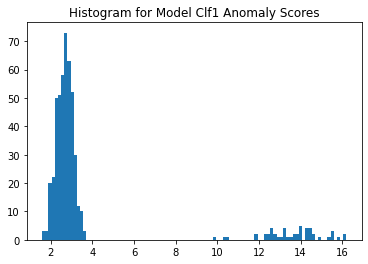

In [40]:
# Get the outlier scores for the train data
y_train_scores = clf1.decision_scores_  

# Predict the anomaly scores
y_test_scores = clf1.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

# Plot it!
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [41]:
y_test_scores.shape

(500,)

In [42]:
# We choose 4.0 to be the cut point and those >=4.0 to be outliers.

In [43]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<4, 0, 1)
df_test['cluster'].value_counts()

df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.038355,2.969163,2.995461,3.003440,2.981764,2.986800,2.992153,2.970264,3.059222,2.996335,...,3.015313,3.007682,3.060115,2.993295,2.946253,3.001370,3.028487,2.971585,3.001477,2.666125
1,0.129767,0.231696,-0.225120,0.273774,0.228626,-0.125085,-0.139579,0.282078,-0.057665,-0.120514,...,0.111293,-0.060746,-0.082725,-0.036849,0.394688,0.339425,0.250229,0.035533,-0.093264,13.593021


In [44]:
df_test.shape

(500, 27)

In [45]:
#### PYOD model 2 ####

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 25)                650       
                                                                 
 dropout_42 (Dropout)        (None, 25)                0         
                                                                 
 dense_89 (Dense)            (None, 25)                650       
                                                                 
 dropout_43 (Dropout)        (None, 25)                0         
                                                                 
 dense_90 (Dense)            (None, 25)                650       
                                                                 
 dropout_44 (Dropout)        (None, 25)                0         
                                                                 
 dense_91 (Dense)            (None, 10)               

Epoch 59/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0927 - val_loss: 1.4395
Epoch 60/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0888 - val_loss: 1.4367
Epoch 61/100
15/15 [==============================] - 0s 6ms/step - loss: 1.0877 - val_loss: 1.4334
Epoch 62/100
15/15 [==============================] - 0s 4ms/step - loss: 1.0841 - val_loss: 1.4309
Epoch 63/100
15/15 [==============================] - 0s 4ms/step - loss: 1.0832 - val_loss: 1.4281
Epoch 64/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0810 - val_loss: 1.4258
Epoch 65/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0772 - val_loss: 1.4232
Epoch 66/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0748 - val_loss: 1.4208
Epoch 67/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0761 - val_loss: 1.4184
Epoch 68/100
15/15 [==============================] - 0s 4ms/step - loss: 1.0746 - val_loss: 1.4148


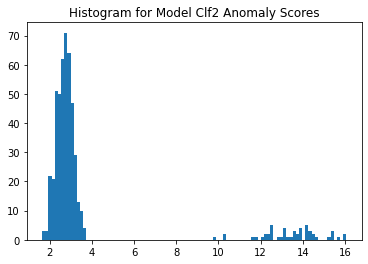

In [46]:
clf2 = AutoEncoder(hidden_neurons =[25, 10,2, 10, 25])
clf2.fit(X_train)

# Predict the anomaly scores
y_test_scores = clf2.decision_function(X_test)  
y_test_scores = pd.Series(y_test_scores)

# Plot the histogram
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

In [47]:
## choose 4.0 to be the cut point and those >=4.0 to be outliers.


In [48]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<4, 0, 1)
df_test['cluster'].value_counts()
df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.038355,2.969163,2.995461,3.003440,2.981764,2.986800,2.992153,2.970264,3.059222,2.996335,...,3.015313,3.007682,3.060115,2.993295,2.946253,3.001370,3.028487,2.971585,3.001477,2.705108
1,0.129767,0.231696,-0.225120,0.273774,0.228626,-0.125085,-0.139579,0.282078,-0.057665,-0.120514,...,0.111293,-0.060746,-0.082725,-0.036849,0.394688,0.339425,0.250229,0.035533,-0.093264,13.474216


In [49]:
### PYOD model 3 ####

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 25)                650       
                                                                 
 dropout_49 (Dropout)        (None, 25)                0         
                                                                 
 dense_97 (Dense)            (None, 25)                650       
                                                                 
 dropout_50 (Dropout)        (None, 25)                0         
                                                                 
 dense_98 (Dense)            (None, 25)                650       
                                                                 
 dropout_51 (Dropout)        (None, 25)                0         
                                                                 
 dense_99 (Dense)            (None, 15)               

15/15 [==============================] - 0s 4ms/step - loss: 1.1227 - val_loss: 1.3301
Epoch 54/100
15/15 [==============================] - 0s 4ms/step - loss: 1.1186 - val_loss: 1.3268
Epoch 55/100
15/15 [==============================] - 0s 6ms/step - loss: 1.1137 - val_loss: 1.3238
Epoch 56/100
15/15 [==============================] - 0s 6ms/step - loss: 1.1104 - val_loss: 1.3212
Epoch 57/100
15/15 [==============================] - 0s 4ms/step - loss: 1.1098 - val_loss: 1.3186
Epoch 58/100
15/15 [==============================] - 0s 3ms/step - loss: 1.1054 - val_loss: 1.3159
Epoch 59/100
15/15 [==============================] - 0s 3ms/step - loss: 1.1076 - val_loss: 1.3133
Epoch 60/100
15/15 [==============================] - 0s 4ms/step - loss: 1.1025 - val_loss: 1.3106
Epoch 61/100
15/15 [==============================] - 0s 3ms/step - loss: 1.1020 - val_loss: 1.3082
Epoch 62/100
15/15 [==============================] - 0s 4ms/step - loss: 1.0959 - val_loss: 1.3061
Epoch 63/100


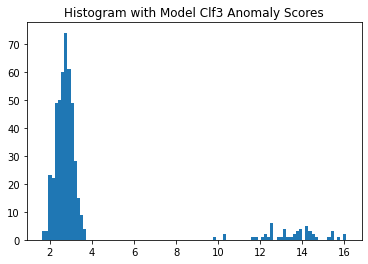

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.038355,2.969163,2.995461,3.003440,2.981764,2.986800,2.992153,2.970264,3.059222,2.996335,...,3.015313,3.007682,3.060115,2.993295,2.946253,3.001370,3.028487,2.971585,3.001477,2.696991
1,0.129767,0.231696,-0.225120,0.273774,0.228626,-0.125085,-0.139579,0.282078,-0.057665,-0.120514,...,0.111293,-0.060746,-0.082725,-0.036849,0.394688,0.339425,0.250229,0.035533,-0.093264,13.497363


In [50]:
# Step 1: Build the model
clf3 = AutoEncoder(hidden_neurons =[25, 15, 10, 2, 10,15, 25])
clf3.fit(X_train)

# Predict the anomaly scores
y_test_scores = clf3.decision_function(X_test)  
y_test_scores = pd.Series(y_test_scores)

# Step 2: Determine the cut point
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram with Model Clf3 Anomaly Scores")
plt.show()

df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<4, 0, 1)
df_test['cluster'].value_counts()

# Step 3: Get the summary statistics by cluster
df_test.groupby('cluster').mean()

In [51]:
"""
Although unsupervised techniques are powerful in detecting outliers, they are prone to overfitting and unstable results. The solution is to train multiple models then aggregate the scores.

"""

'\nAlthough unsupervised techniques are powerful in detecting outliers, they are prone to overfitting and unstable results. The solution is to train multiple models then aggregate the scores.\n\n'

In [52]:
"""
There are four methods to aggregate the outcome as below.
Average: average scores of all detectors.
Maximum of Maximum (MOM)
Average of Maximum (AOM)
Maximum of Average (MOA)

"""

'\nThere are four methods to aggregate the outcome as below.\nAverage: average scores of all detectors.\nMaximum of Maximum (MOM)\nAverage of Maximum (AOM)\nMaximum of Average (MOA)\n\n'

In [53]:
##### Average Method  #####

In [54]:
# Combination by max
# Put all the predictions in a data frame
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer

# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test),
                             'clf3': clf3.decision_function(X_test) 
                            })

In [55]:
# Although we did standardization before, it was for the variables.
# Now we do the standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [56]:
########### Average Method ############

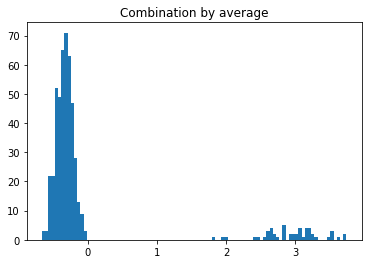

In [57]:
# Combination by average
y_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [58]:
#### e can identify those >=0.0 as the outliers.

In [59]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<0, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    450
1     50
Name: y_by_average_cluster, dtype: int64

In [60]:
### Maximum of Maximum Method ###

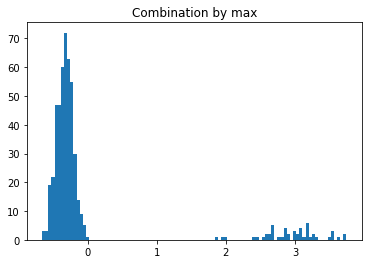

In [61]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

In [62]:
df_test = pd.DataFrame(X_test)
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<0, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    450
1     50
Name: y_by_maximization_cluster, dtype: int64

In [63]:
df_test.groupby('y_by_maximization_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,,,,,,,,,,,
0,3.038355,2.969163,2.995461,3.003440,2.981764,2.986800,2.992153,2.970264,3.059222,2.996335,...,3.060115,2.993295,2.946253,3.001370,3.028487,2.971585,3.001477,-0.331740,0.0,-0.328157
1,0.129767,0.231696,-0.225120,0.273774,0.228626,-0.125085,-0.139579,0.282078,-0.057665,-0.120514,...,-0.082725,-0.036849,0.394688,0.339425,0.250229,0.035533,-0.093264,2.952359,1.0,2.954828
